In [1]:
import json
from pathlib import Path
from collections import defaultdict
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [11]:
base_path = Path("../logs/exp_generalization_datasets/results_SAT1Base.json")
gru_path = Path("../logs/exp_generalization_datasets/results_SAT1GRU.json")
transformer_path = Path("../logs/exp_generalization_datasets/results_TransformerModel.json")
paths = [base_path, gru_path, transformer_path]
paths=[gru_path]
# path_to_model = {str(base_path): 'CNN', str(gru_path): 'GRU', str(transformer_path): 'Transformer'}
path_to_model = {str(gru_path): 'GRU'}

In [12]:
# classes = ['pre-attentive', 'encoding', 'confirmation', 'decision', 'response']
classes = ['encoding', 'confirmation', 'decision', 'response']

In [15]:
# Per class accuracy does not exist, only precision and f1-score
def get_metric(path, to, metric):
    scores = defaultdict(lambda: list())
    data = json.load(path.open())
    data_keys = {'sat2': '0', 'sat1': '1', 'ar': '2'}
    for fold in data[data_keys[to]]:
        for label in ['0', '1', '2', '3']:
            if metric == 'precision':
                metric_value = fold[label][metric]
            elif metric == 'f1-score':
                metric_value = fold[label][metric]
            scores[label].append(metric_value)
    return scores

def plot_performance_per_class(to='sat2', metric='precision', paths=[]):
    avgs = defaultdict(lambda: list())
    for path in paths:
        scores = get_metric(path, to=to, metric=metric)
        for key, val in scores.items():
            mean = sum(val)/len(val)
            avgs[path_to_model[str(path)]].append(mean)

    df = pd.DataFrame(avgs).T

    df.columns = classes
    # df.index = [path.stem for path in df.index]
    df = df.reset_index().melt(id_vars='index', var_name='Class', value_name='Performance')

    plt.figure(figsize=(10, 6))
    plt.ylim(0.0, 1.0)
    sns.barplot(data=df, x='Class', y='Performance', hue='index')
    plt.title(f'Performance Per Class for Each Model (Trained on SAT2, tested on {to.upper()})')
    plt.xlabel('Class')
    plt.ylabel(metric)
    plt.legend(title='Model', loc='lower right')
    plt.show()

metric = 'f1-score'

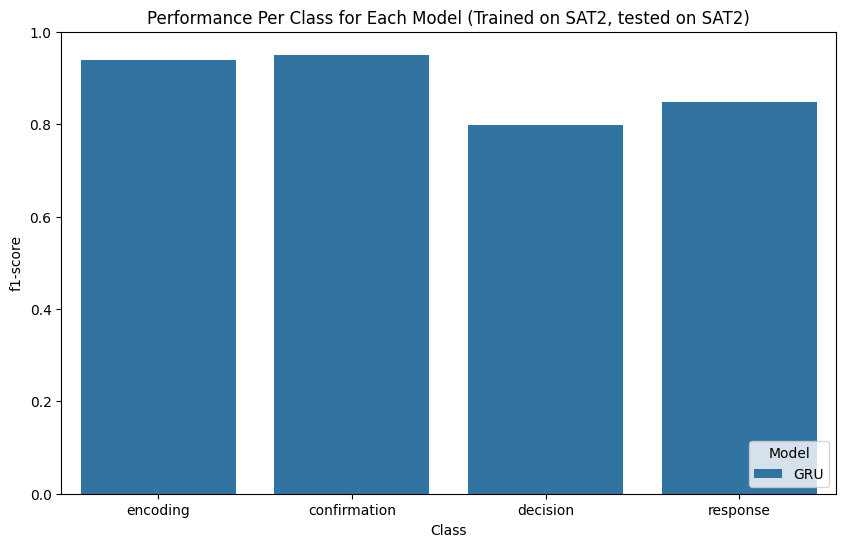

In [17]:
plot_performance_per_class(to='sat2', metric=metric, paths=paths)

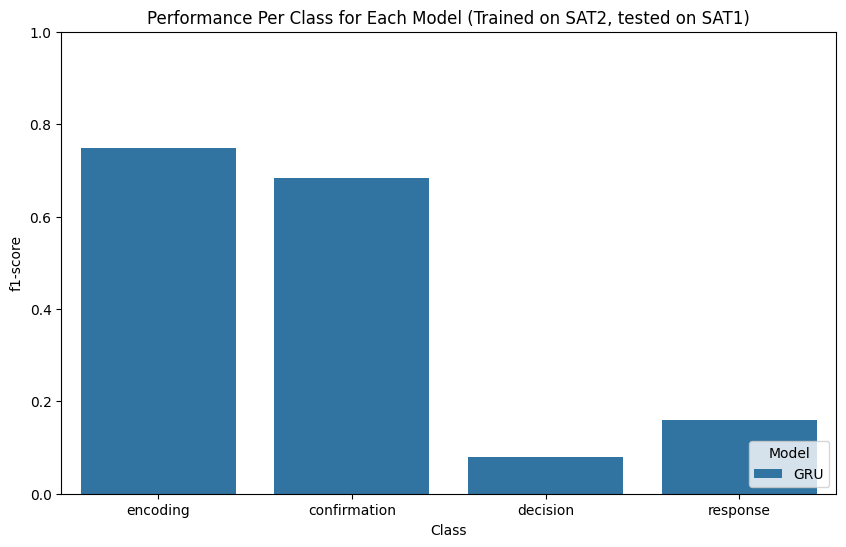

In [19]:
plot_performance_per_class(to='sat1', metric=metric, paths=paths)

In [ ]:
plot_performance_per_class(to='ar', metric=metric)